# Plot of principal null geodesics in Kerr spacetime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/)
  
Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/Kerr_princ_null_geod.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`

In [1]:
%display latex

In [2]:
a = 0.5
m = 1 
rp = m + sqrt(m^2-a^2)
rm = m - sqrt(m^2-a^2)
(rp,rm)

(1.86602540378444, 0.133974596215561)

In [3]:
f_in(r,v) = v - r
f_in

(r, v) |--> -r + v

In [4]:
f_out(r,u) = u + r + 2*m/sqrt(m^2-a^2)*(rp*ln(abs((r-rp)/(2*m))) - rm*ln(abs((r-rm)/(2*m))))
f_out

(r, u) |--> r + u - 0.309401076758503*log(abs(1/2*r - 0.0669872981077807)) + 4.30940107675850*log(abs(1/2*r - 0.933012701892219))

In [5]:
rmin = -8; rmax = 8
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += plot(f_out(r, u0), (r, rmin, rmax), color='green', ticks=2)

In [6]:
for v0 in range(-20, 20, 2):
    graph += plot(f_in(r, v0), (r, rmin, rmax), color='green', linestyle='--')

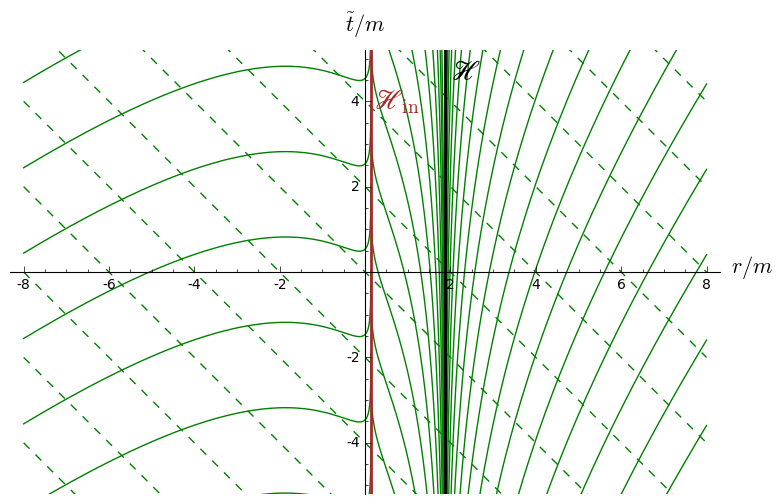

In [7]:
H = line(((rp, -8), (rp, 8)), color='black', thickness=2) + \
    text(r'$\mathscr{H}$', (rp+0.5, 4.7), color='black', fontsize=20)
Hin = line(((rm, -8), (rm, 8)), color='brown', thickness=2) + \
    text(r'$\mathscr{H}_{\rm in}$', (rm+0.6, 4), color='brown', fontsize=20)
graph += H + Hin
show(graph, axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], aspect_ratio=1, ymin=-5, ymax=5)

In [8]:
graph.save("ker_princ_null_geod.pdf", axes_labels=[r"$r/m$", r"$\tilde{t}/m$"], 
            aspect_ratio=1, ymin=-5, ymax=5)